In [1]:
# MANIPULATIONS ON CLAIMS_DATA
#1step
#importing the libraries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
#set to display all columns in datasets
pd.set_option("display.max_columns",None)
#to run queries on sql data frame
import pandasql as psql

In [2]:
#2step
#load the claims data
claims=pd.read_excel(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\Claims_Data_Missing_Values.xlsx",header=0)
#copy to backup files
claims_BK1=claims.copy()
claims_BK2=claims.copy()
#display claims data
claims

,Claim_ID,Policy_Num,Driver_Age,Policy_Type,Pre_Claims,Premium_AMT,Claim_AMT
0,CL-1292034,176751871.0,25.0,Car,0.0,1272.45,12634.25
1,CL-1742889,135517422.0,26.0,Truck,NaN,1052.25,8956.15
2,CL-1384474,176552663.0,19.0,Car,1.0,1389.75,3691.65
3,CL-1283351,157711099.0,35.0,Car,0.0,980.85,NaN
4,CL-1712003,140846711.0,NaN,Car,NaN,1567.45,2934.25
5,CL-1518709,126885444.0,NaN,Van,0.0,1173.95,590.65
6,CL-1661021,191874052.0,61.0,NaN,0.0,NaN,1492.35
7,CL-1622931,184558739.0,38.0,Van,0.0,1146.95,962.15
8,CL-1470986,179027710.0,NaN,Van,1.0,1453.65,2691.95
9,CL-1886922,179500989.0,53.0,Truck,0.0,1252.25,NaN


In [3]:
claims.isnull().sum()

Claim_ID       0
Policy_Num     1
Driver_Age     6
Policy_Type    1
Pre_Claims     4
Premium_AMT    4
Claim_AMT      5
dtype: int64

In [4]:
#identify the missing values in claims 
claims.isnull().sum()

Claim_ID       0
Policy_Num     1
Driver_Age     6
Policy_Type    1
Pre_Claims     4
Premium_AMT    4
Claim_AMT      5
dtype: int64

In [5]:
#%age of each missing variables
for i in claims.columns:
    print((claims[i].isnull().sum())/len(claims)*100)

0.0
4.761904761904762
28.57142857142857
4.761904761904762
19.047619047619047
19.047619047619047
23.809523809523807


In [6]:
len(claims)

21

<Axes: >

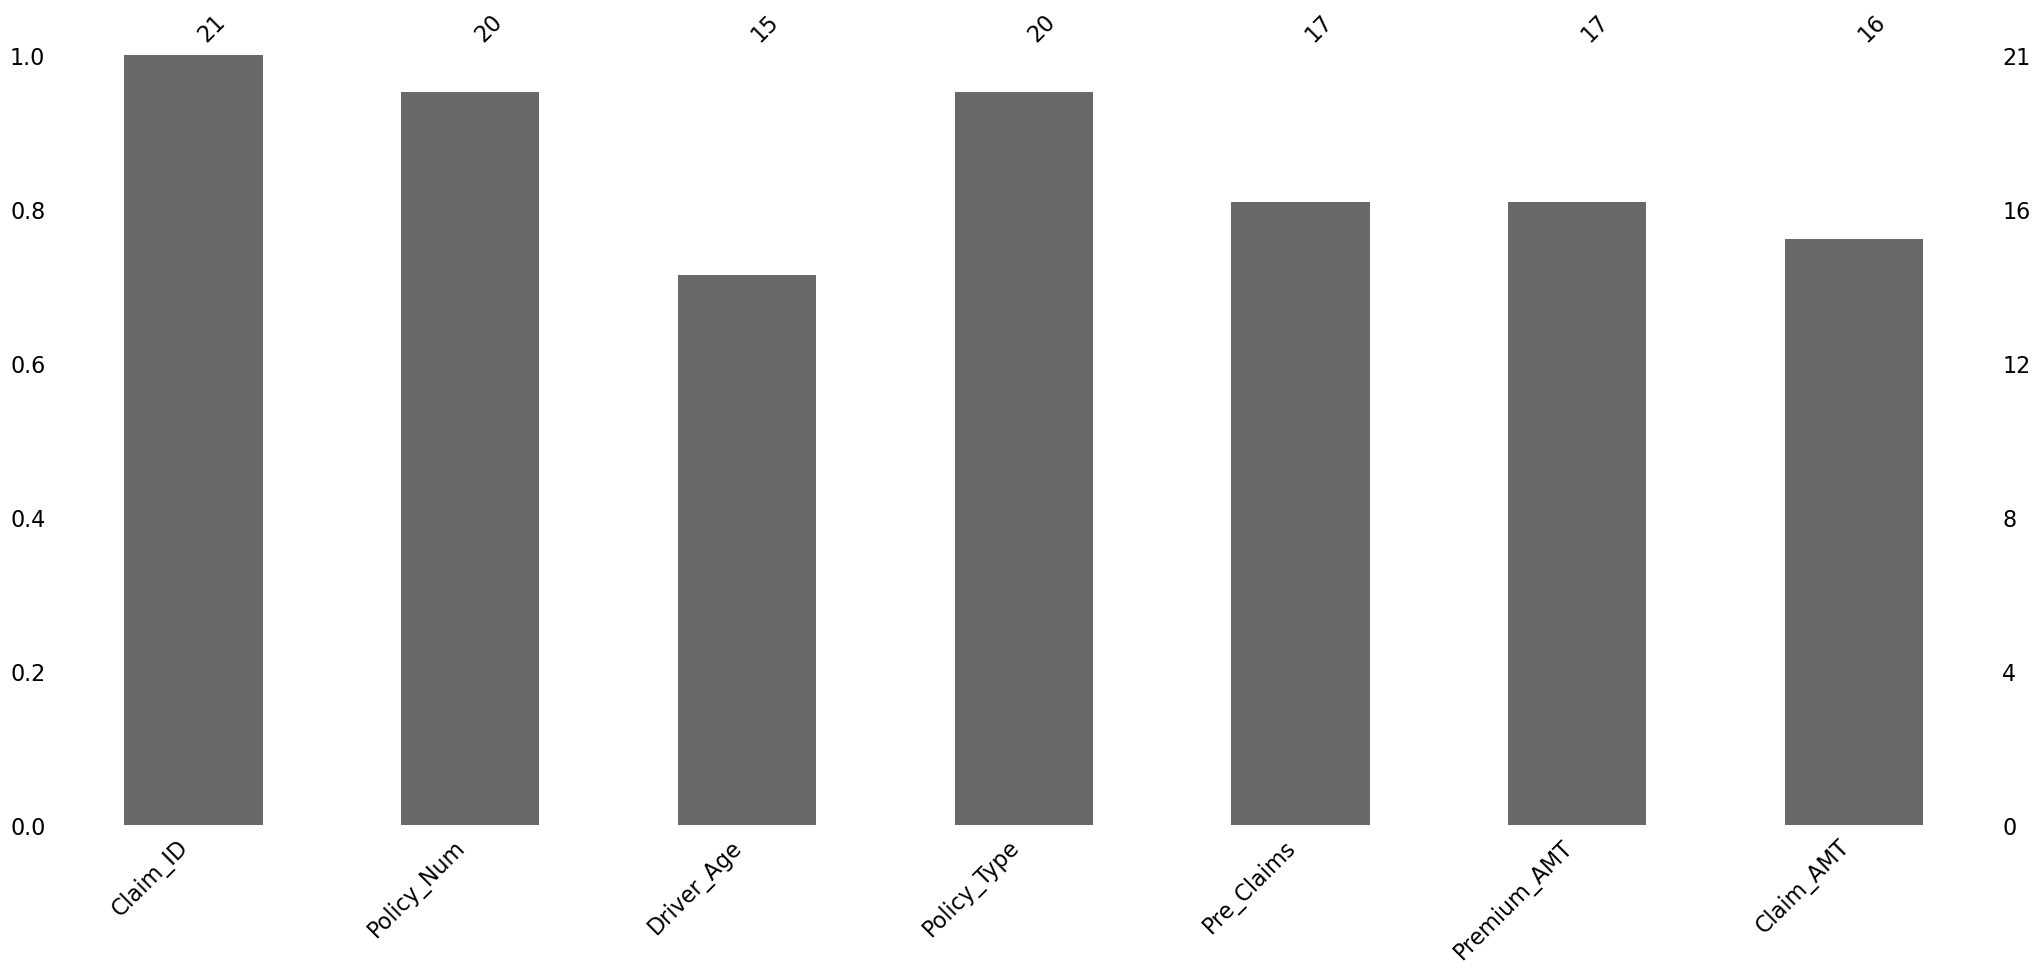

In [7]:
#missingno is a simple python library that presents a series of visualization
import missingno as msno
msno.bar(claims)

In [8]:
#step6
#using KNN imputer to adress Driver_age missing values
#KNNImputer(missing_values=np.nan,n_neighbours=5,weights="uniform",metric="nan_euclidean",
#copy=True,add_indicator=False)
from sklearn.impute import KNNImputer
#create an object
imputer_knn=KNNImputer(missing_values=np.nan)
claims_BK1["Driver_Age"]=imputer_knn.fit_transform(claims_BK1[['Driver_Age']])
claims_BK1["Driver_Age"]=claims_BK1['Driver_Age'].astype(int)
claims_BK1

,Claim_ID,Policy_Num,Driver_Age,Policy_Type,Pre_Claims,Premium_AMT,Claim_AMT
0,CL-1292034,176751871.0,25,Car,0.0,1272.45,12634.25
1,CL-1742889,135517422.0,26,Truck,NaN,1052.25,8956.15
2,CL-1384474,176552663.0,19,Car,1.0,1389.75,3691.65
3,CL-1283351,157711099.0,35,Car,0.0,980.85,NaN
4,CL-1712003,140846711.0,40,Car,NaN,1567.45,2934.25
5,CL-1518709,126885444.0,40,Van,0.0,1173.95,590.65
6,CL-1661021,191874052.0,61,NaN,0.0,NaN,1492.35
7,CL-1622931,184558739.0,38,Van,0.0,1146.95,962.15
8,CL-1470986,179027710.0,40,Van,1.0,1453.65,2691.95
9,CL-1886922,179500989.0,53,Truck,0.0,1252.25,NaN


In [9]:
claims_BK1["Premium_AMT"]=imputer_knn.fit_transform(claims_BK1[["Premium_AMT"]])
claims_BK1

,Claim_ID,Policy_Num,Driver_Age,Policy_Type,Pre_Claims,Premium_AMT,Claim_AMT
0,CL-1292034,176751871.0,25,Car,0.0,1272.450000,12634.25
1,CL-1742889,135517422.0,26,Truck,NaN,1052.250000,8956.15
2,CL-1384474,176552663.0,19,Car,1.0,1389.750000,3691.65
3,CL-1283351,157711099.0,35,Car,0.0,980.850000,NaN
4,CL-1712003,140846711.0,40,Car,NaN,1567.450000,2934.25
5,CL-1518709,126885444.0,40,Van,0.0,1173.950000,590.65
6,CL-1661021,191874052.0,61,NaN,0.0,1317.179412,1492.35
7,CL-1622931,184558739.0,38,Van,0.0,1146.950000,962.15
8,CL-1470986,179027710.0,40,Van,1.0,1453.650000,2691.95
9,CL-1886922,179500989.0,53,Truck,0.0,1252.250000,NaN


In [10]:
#filling missing values of claim_amt
claims_BK1["Claim_AMT"]=imputer_knn.fit_transform(claims_BK1[["Claim_AMT"]])
claims_BK1

,Claim_ID,Policy_Num,Driver_Age,Policy_Type,Pre_Claims,Premium_AMT,Claim_AMT
0,CL-1292034,176751871.0,25,Car,0.0,1272.450000,12634.25000
1,CL-1742889,135517422.0,26,Truck,NaN,1052.250000,8956.15000
2,CL-1384474,176552663.0,19,Car,1.0,1389.750000,3691.65000
3,CL-1283351,157711099.0,35,Car,0.0,980.850000,3145.04375
4,CL-1712003,140846711.0,40,Car,NaN,1567.450000,2934.25000
5,CL-1518709,126885444.0,40,Van,0.0,1173.950000,590.65000
6,CL-1661021,191874052.0,61,NaN,0.0,1317.179412,1492.35000
7,CL-1622931,184558739.0,38,Van,0.0,1146.950000,962.15000
8,CL-1470986,179027710.0,40,Van,1.0,1453.650000,2691.95000
9,CL-1886922,179500989.0,53,Truck,0.0,1252.250000,3145.04375


In [11]:
#step9
#fill null values of Policy_Num with actual value "123456789"
claims_BK1=claims_BK1.fillna({"Policy_Num":123456789})
claims_BK1["Policy_Num"]=claims_BK1["Policy_Num"].astype(int)
claims_BK1

,Claim_ID,Policy_Num,Driver_Age,Policy_Type,Pre_Claims,Premium_AMT,Claim_AMT
0,CL-1292034,176751871,25,Car,0.0,1272.450000,12634.25000
1,CL-1742889,135517422,26,Truck,NaN,1052.250000,8956.15000
2,CL-1384474,176552663,19,Car,1.0,1389.750000,3691.65000
3,CL-1283351,157711099,35,Car,0.0,980.850000,3145.04375
4,CL-1712003,140846711,40,Car,NaN,1567.450000,2934.25000
5,CL-1518709,126885444,40,Van,0.0,1173.950000,590.65000
6,CL-1661021,191874052,61,NaN,0.0,1317.179412,1492.35000
7,CL-1622931,184558739,38,Van,0.0,1146.950000,962.15000
8,CL-1470986,179027710,40,Van,1.0,1453.650000,2691.95000
9,CL-1886922,179500989,53,Truck,0.0,1252.250000,3145.04375


In [12]:
#find the policy_type by count
claims_BK1["Policy_Type"].value_counts()

Car      9
Van      6
Truck    5
Name: Policy_Type, dtype: int64

In [13]:
#find the pre_claims by count
claims_BK1["Pre_Claims"].value_counts()

0.0    12
1.0     5
Name: Pre_Claims, dtype: int64

In [14]:
#simple imputer(missing_values=np.nan,strategy="mean" ,fill_value=None,verbase=0,copy=True,add_indicator=False)
from sklearn.impute import SimpleImputer
#SimpleImputer(missing_values=nan,strategy="mean",fill_value=None,metric="nan_euclidean",
#copy=True,add_indicator=False)
imputer_si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
claims_BK1["Policy_Type"]=imputer_si.fit_transform(claims_BK1[['Policy_Type']])
claims_BK1["Pre_Claims"]=imputer_si.fit_transform(claims_BK1[["Pre_Claims"]])
claims_BK1["Pre_Claims"]=claims_BK1["Pre_Claims"].astype(int)
claims_BK1

,Claim_ID,Policy_Num,Driver_Age,Policy_Type,Pre_Claims,Premium_AMT,Claim_AMT
0,CL-1292034,176751871,25,Car,0,1272.450000,12634.25000
1,CL-1742889,135517422,26,Truck,0,1052.250000,8956.15000
2,CL-1384474,176552663,19,Car,1,1389.750000,3691.65000
3,CL-1283351,157711099,35,Car,0,980.850000,3145.04375
4,CL-1712003,140846711,40,Car,0,1567.450000,2934.25000
5,CL-1518709,126885444,40,Van,0,1173.950000,590.65000
6,CL-1661021,191874052,61,Car,0,1317.179412,1492.35000
7,CL-1622931,184558739,38,Van,0,1146.950000,962.15000
8,CL-1470986,179027710,40,Van,1,1453.650000,2691.95000
9,CL-1886922,179500989,53,Truck,0,1252.250000,3145.04375


In [15]:
pwd

'C:\\Users\\R Sobha Supriya\\internship cllg\\python course'